# string model 3 literature

In [1]:
import boolean_model_helper as bm
import string_model_drawer as draw
from string_model_builder_3 import string2definition, add_mtb2definition

In [2]:
mtb = ["Eis" , "esxA" ,"esxH_esxG" ,"IpdC" ,"ndkA" ,"PPE2" ,"PstS1" ,"PtpA" ,"Rv2779c" ,"SapM"]
hit = ['AP1B1','ARL10','ASPSCR1','CHMP2A','KIF6','CLVS2','CDC42EP3','CHMP2B','GGA1','GOLT1B','HIP1R','VPS26B','PKD1L2','RIMS2','VCP']
complexes = ['ESCRT_complexes', 'MHC_I_complexes', 'vATPase_complexes', 'ImportinBetaAlpha_complexes']
processes = ['Phagosome_maturation', 'Phagosome_acidification', 'Phagolysosome_assembly']


model 3

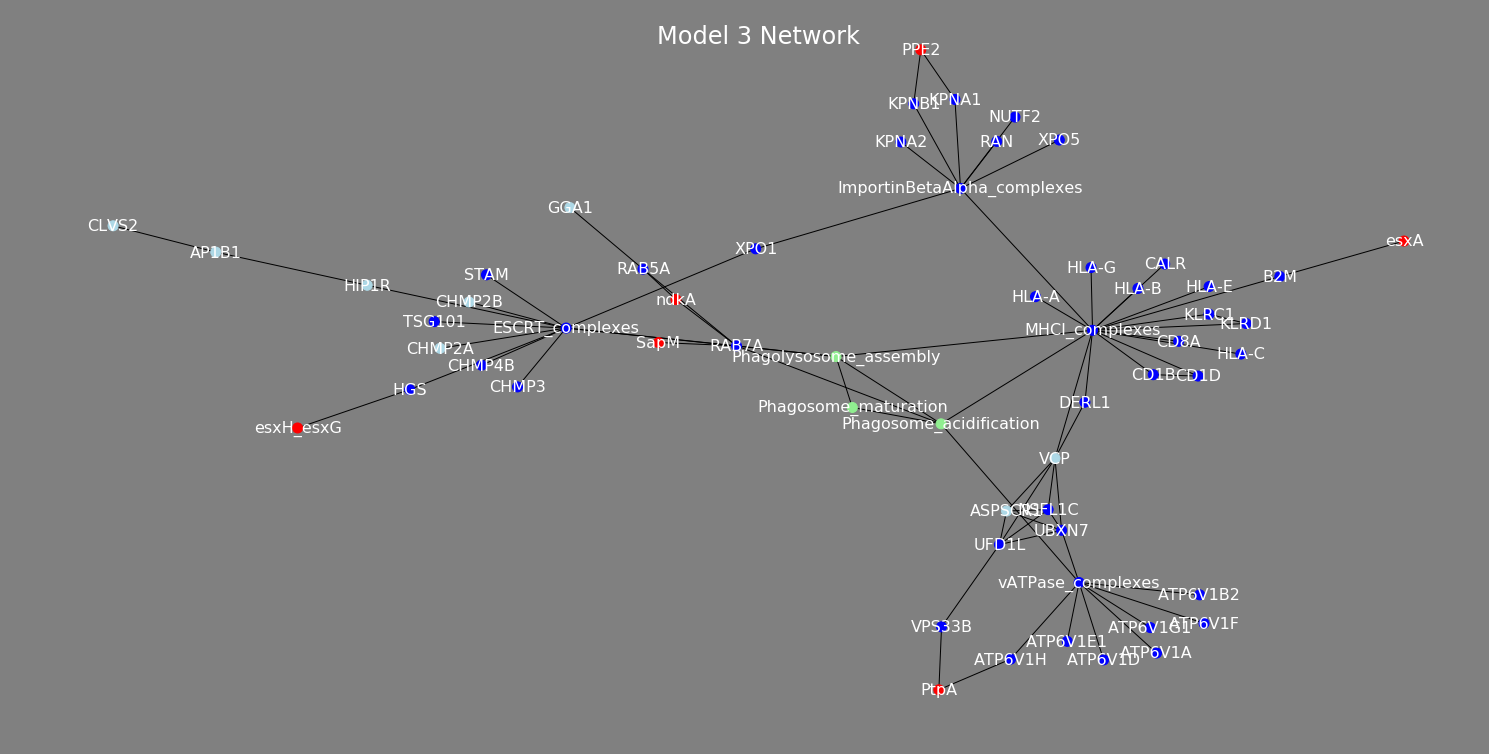

In [4]:
draw.draw_edgelists('string-network-2.csv', # model 3 changes just at the process level
                    add_mtb='mtb-edgelist.csv', 
                    add_process='string-3-process-edgelist.csv',
                    highlight=hit,
                    title='Model 3 Network'
              )

In [5]:
definition = string2definition('string_model_3_definition.txt')
hit = [factor for factor in hit if factor in definition]
print definition

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rules
vATPase_complexes *= ATP6V1F and ATP6V1B2 and ATP6V1A and ATP6V1G1 and ATP6V1D and ATP6V1E1 and ATP6V1H
ESCRT_complexes *= HGS and CHMP2A and CHMP4B and CHMP2B and CHMP3 and STAM and TSG101
MHC_I_complexes *= B2M and HLA-C and HLA-B and HLA-G and HLA-E and CD

1 mtb on/off

In [6]:
# define models
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
mtb = [factor for factor in mtb if factor in definition_mtb] # just factors modelled for drawing


added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [7]:
# run model
models = bm.run_model(definition_mtb, steps=50, runs=100)

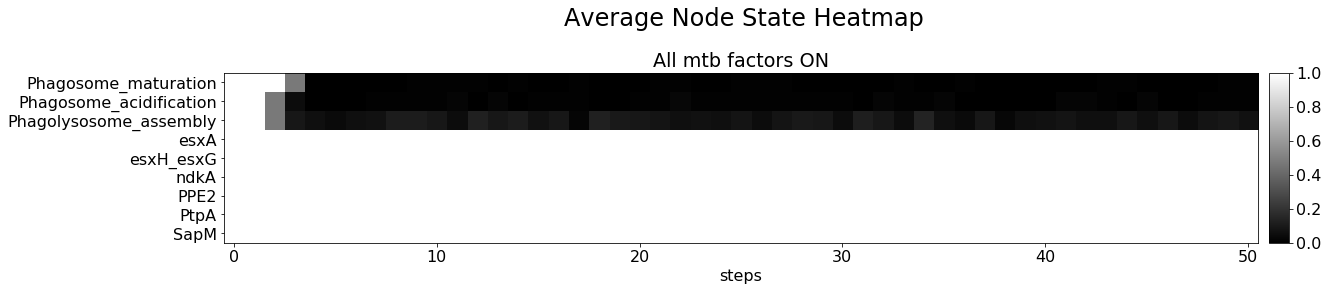

In [8]:
# plot average
avg = bm.average_models(models)
bm.plot_maps([avg],
             titles=['mtb'], 
             nodes = processes + mtb,
             h = 4,
             top = 0.75,
             bottom=0.16,
             left=.16,
             suptitle='        Average Node State Heatmap' # white space to centre
            )

In [9]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)

('none: 77', 'steady: 23', 'other: 0')
[6.21 0.23]
index 	size
0 	0
23 	1
39 	1
0 	0
0 	0
0 	0
47 	1
44 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
21 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
6 	1
30 	1
0 	0
0 	0
26 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
10 	1
12 	1
12 	1
0 	0
0 	0
0 	0
0 	0
0 	0
19 	1
0 	0
0 	0
0 	0
0 	0
0 	0
12 	1
0 	0
0 	0
0 	0
0 	0
0 	0
34 	1
0 	0
0 	0
0 	0
44 	1
0 	0
49 	1
35 	1
0 	0
0 	0
0 	0
7 	1
0 	0
32 	1
0 	0
0 	0
34 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
41 	1
0 	0
0 	0
0 	0
0 	0
27 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
17 	1
0 	0
0 	0
0 	0
0 	0
0 	0


In [11]:
# look at factors one at a time
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', False)
avgs = []
for factor in mtb:
    definition_loop = bm.switch(definition_mtb,on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=100)
    avgs.append(bm.average_models(models))

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


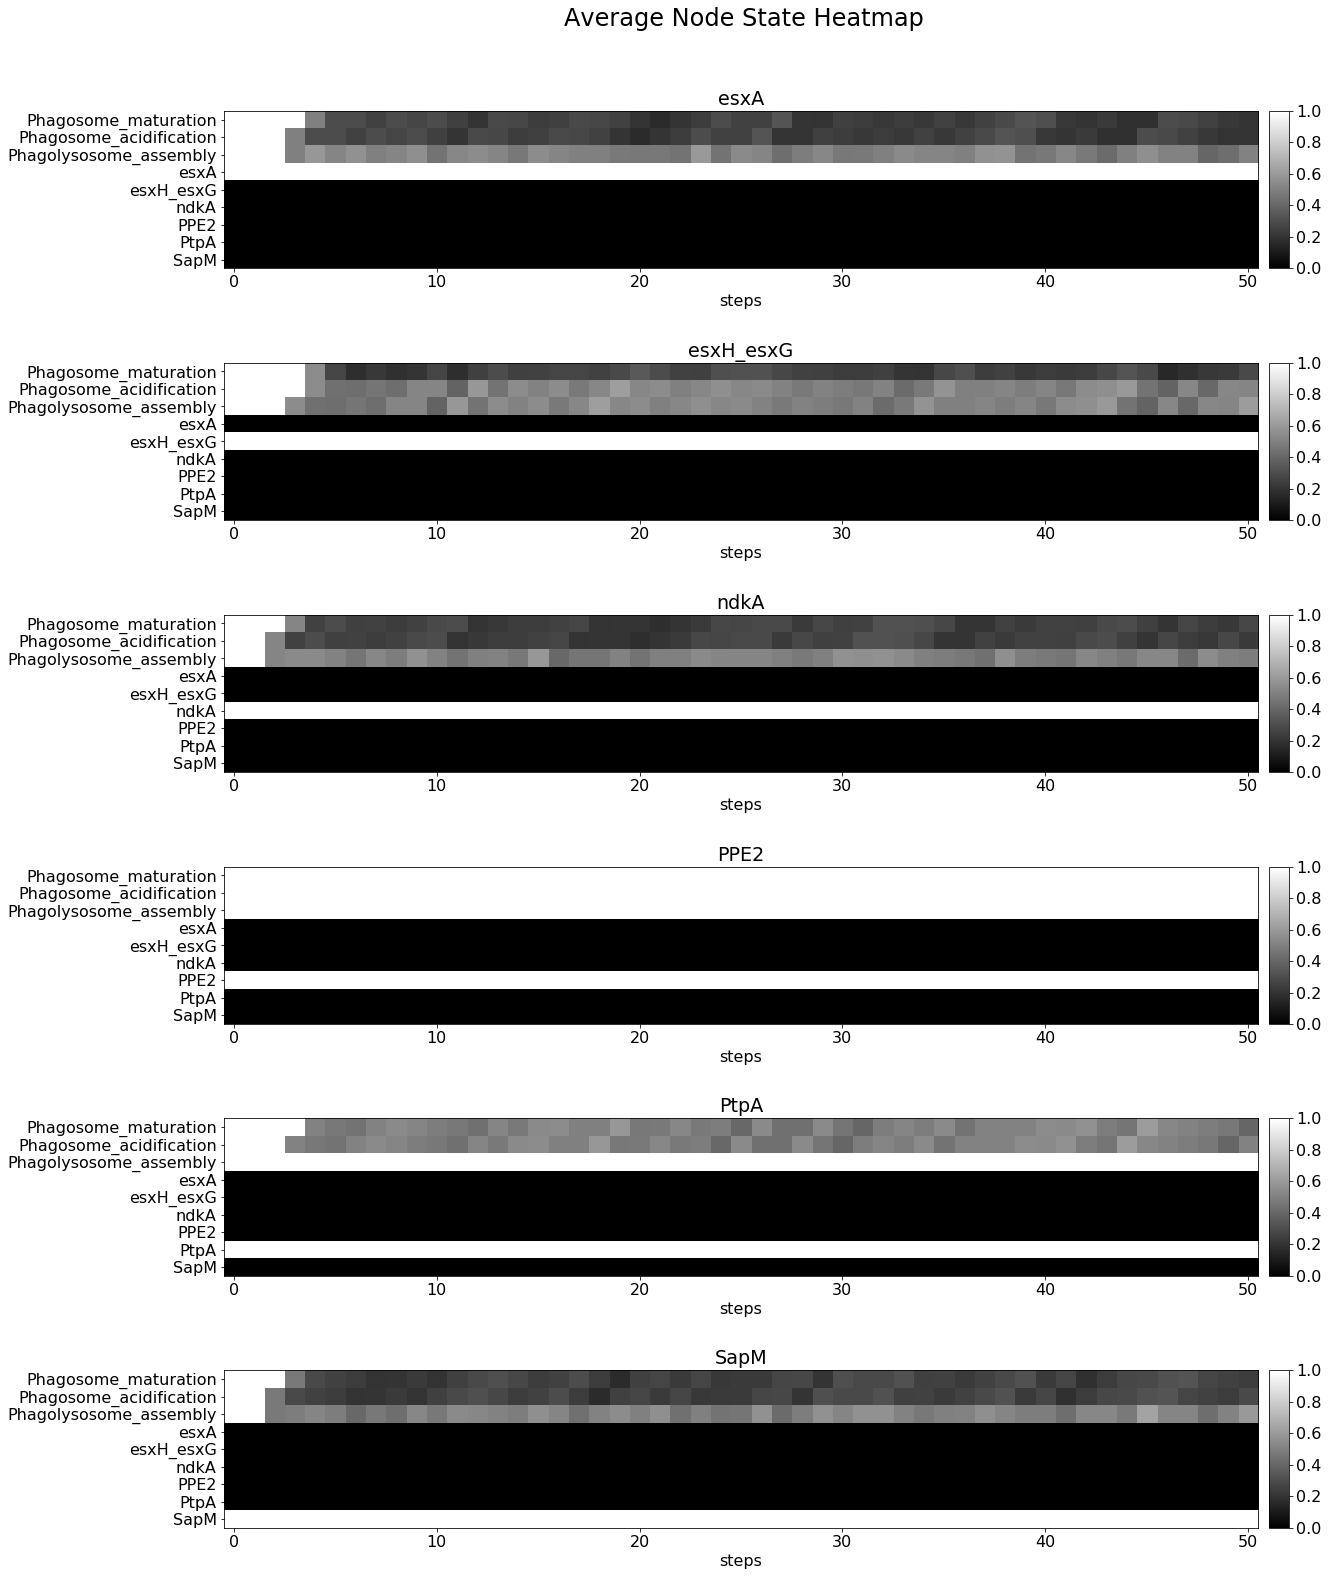

In [22]:
bm.plot_maps(avgs,
             titles=mtb, 
             nodes = processes + mtb,
             h = 4,
             top = 0.92,
             bottom=0.1,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.6
            )

2 knockouts null 

In [23]:
print definition 

#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rules
vATPase_complexes *= ATP6V1F and ATP6V1B2 and ATP6V1A and ATP6V1G1 and ATP6V1D and ATP6V1E1 and ATP6V1H
ESCRT_complexes *= HGS and CHMP2A and CHMP4B and CHMP2B and CHMP3 and STAM and TSG101
MHC_I_complexes *= B2M and HLA-C and HLA-B and HLA-G and HLA-E and CD

In [24]:
#knockout hits
definition_knockouts = bm.knockout(definition, hit)
print definition_knockouts

#initial conditions
VCP = False #knockout
HIP1R = False #knockout
GGA1 = False #knockout
CHMP2B = False #knockout
CLVS2 = False #knockout
CHMP2A = False #knockout
ASPSCR1 = False #knockout
AP1B1 = False #knockout
#AP1B1 = True
#ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
#CHMP2A = True
#CHMP2B = True
CHMP3 = True
CHMP4B = True
#CLVS2 = True
DERL1 = True
#GGA1 = True
HGS = True
#HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rules
vATPase_complexes *= ATP6V1F and ATP6V1B2 and ATP6V1A and 

In [26]:
# runs
models = bm.run_model(definition_knockouts, steps=50, runs=100)

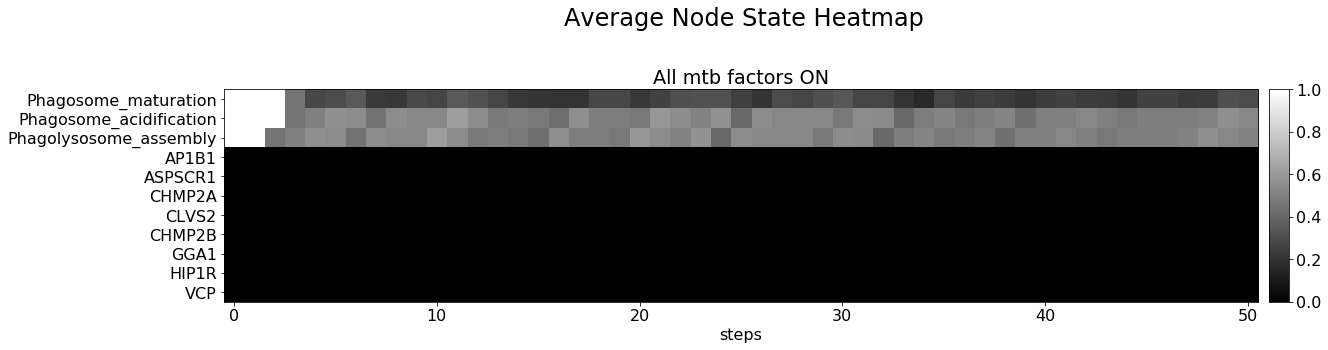

In [29]:
# average heatmaps
avg = bm.average_models(models)
bm.plot_maps([avg],
             titles=['knockouts'], 
             nodes = processes + hit,
             h = 5,
             top = 0.75,
             bottom=0.16,
             left=.16,
             suptitle='        Average Node State Heatmap' # white space to centre
            )
# bm.plot_data(avg, nodes = processes + hit, h=5, w=20, fontsize=18, title='Node Heatmap: 100 run average')

In [30]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)
models[2].report_cycles()

('none: 0', 'steady: 96', 'other: 4')
[8.96 1.05]
index 	size
0 	1
0 	1
0 	1
17 	1
3 	1
0 	1
22 	1
16 	2
8 	1
3 	1
0 	1
12 	1
0 	1
20 	1
13 	1
27 	1
0 	1
3 	1
0 	1
0 	1
21 	1
0 	1
16 	2
0 	1
12 	1
12 	1
0 	1
6 	1
0 	1
3 	1
37 	1
0 	1
0 	1
0 	1
32 	1
3 	1
3 	1
3 	1
0 	1
0 	1
46 	1
16 	1
0 	1
42 	1
0 	1
47 	1
12 	1
24 	1
0 	1
0 	1
0 	1
0 	1
6 	1
15 	1
0 	1
0 	1
0 	1
9 	1
0 	1
9 	1
0 	1
0 	1
28 	1
0 	1
9 	1
11 	1
0 	1
0 	1
0 	1
12 	1
13 	1
0 	1
9 	1
7 	1
0 	1
0 	1
17 	1
0 	1
0 	1
0 	1
46 	1
17 	1
27 	1
0 	1
0 	1
8 	1
0 	1
39 	3
18 	1
11 	1
32 	1
22 	1
15 	1
5 	1
6 	1
8 	1
0 	1
0 	1
18 	2
0 	1
Steady state starting at index 0 -> State: AP1B1=False, ASPSCR1=False, ATP6V1A=True, ATP6V1B2=True, ATP6V1D=True, ATP6V1E1=True, ATP6V1F=True, ATP6V1G1=True, ATP6V1H=True, B2M=True, CALR=True, CD1B=True, CD1D=True, CD8A=True, CHMP2A=False, CHMP2B=False, CHMP3=True, CHMP4B=True, CLVS2=False, DERL1=True, ESCRT_complexes=True, GGA1=False, HGS=True, HIP1R=False, HLA-A=True, HLA-B=True, HLA-C=True, HLA-E=

In [31]:
# turn mtb on
definition_knockouts_mtb = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', True) 
print definition_knockouts_mtb

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']
#initial conditions
VCP = False #knockout
HIP1R = False #knockout
GGA1 = False #knockout
CHMP2B = False #knockout
CLVS2 = False #knockout
CHMP2A = False #knockout
ASPSCR1 = False #knockout
AP1B1 = False #knockout
#AP1B1 = True
#ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
#CHMP2A = True
#CHMP2B = True
CHMP3 = True
CHMP4B = True
#CLVS2 = True
DERL1 = True
#GGA1 = True
HGS = True
#HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
#VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rul

In [32]:
# runs
models = bm.run_model(definition_knockouts_mtb, steps=50, runs=100)

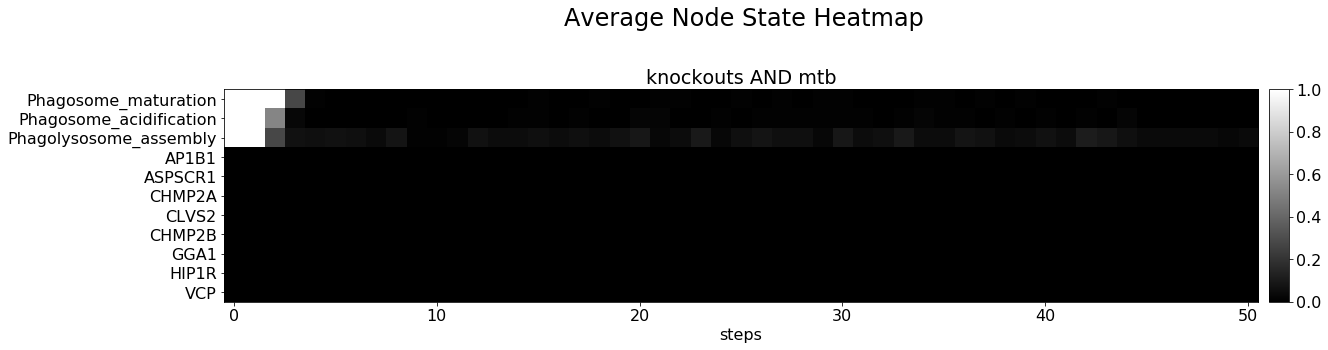

In [34]:
# average heatmaps
avg = bm.average_models(models)
bm.plot_maps([avg],
             titles=['knockouts AND mtb'], 
             nodes = processes + hit,
             h = 5,
             top = 0.75,
             bottom=0.16,
             left=.16,
             suptitle='        Average Node State Heatmap' # white space to centre
            )

In [35]:
# analyse behaviour
cycles = bm.get_cycles(models)
print bm.count_cycles(cycles)
print bm.average_cycles(cycles)
bm.print_cycles(cycles)

('none: 70', 'steady: 28', 'other: 2')
[7.63 0.32]
index 	size
22 	1
0 	0
0 	0
0 	0
0 	0
26 	1
0 	0
33 	1
0 	0
16 	1
0 	0
44 	1
0 	0
46 	1
0 	0
27 	1
33 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
49 	1
0 	0
11 	2
0 	0
20 	1
5 	1
8 	1
0 	0
19 	1
0 	0
4 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
40 	1
45 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
24 	1
0 	0
0 	0
0 	0
0 	0
14 	1
39 	1
0 	0
0 	0
0 	0
40 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
35 	1
15 	1
0 	0
0 	0
0 	0
42 	1
0 	0
0 	0
0 	0
0 	0
13 	1
6 	1
0 	0
0 	0
9 	1
0 	0
0 	0
0 	0
24 	1
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
0 	0
19 	1
35 	2
0 	0


In [36]:
# knockouts less mtb
definition_knockouts_mtb = add_mtb2definition(definition_knockouts, 'mtb-edgelist.csv', False)

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']


In [37]:
avgs = []
for factor in mtb:
    definition_loop = bm.switch(definition_knockouts_mtb, on=[factor])
    models = bm.run_model(definition_loop, steps=50, runs=100)
    avg = bm.average_models(models)
    avgs.append(avg)

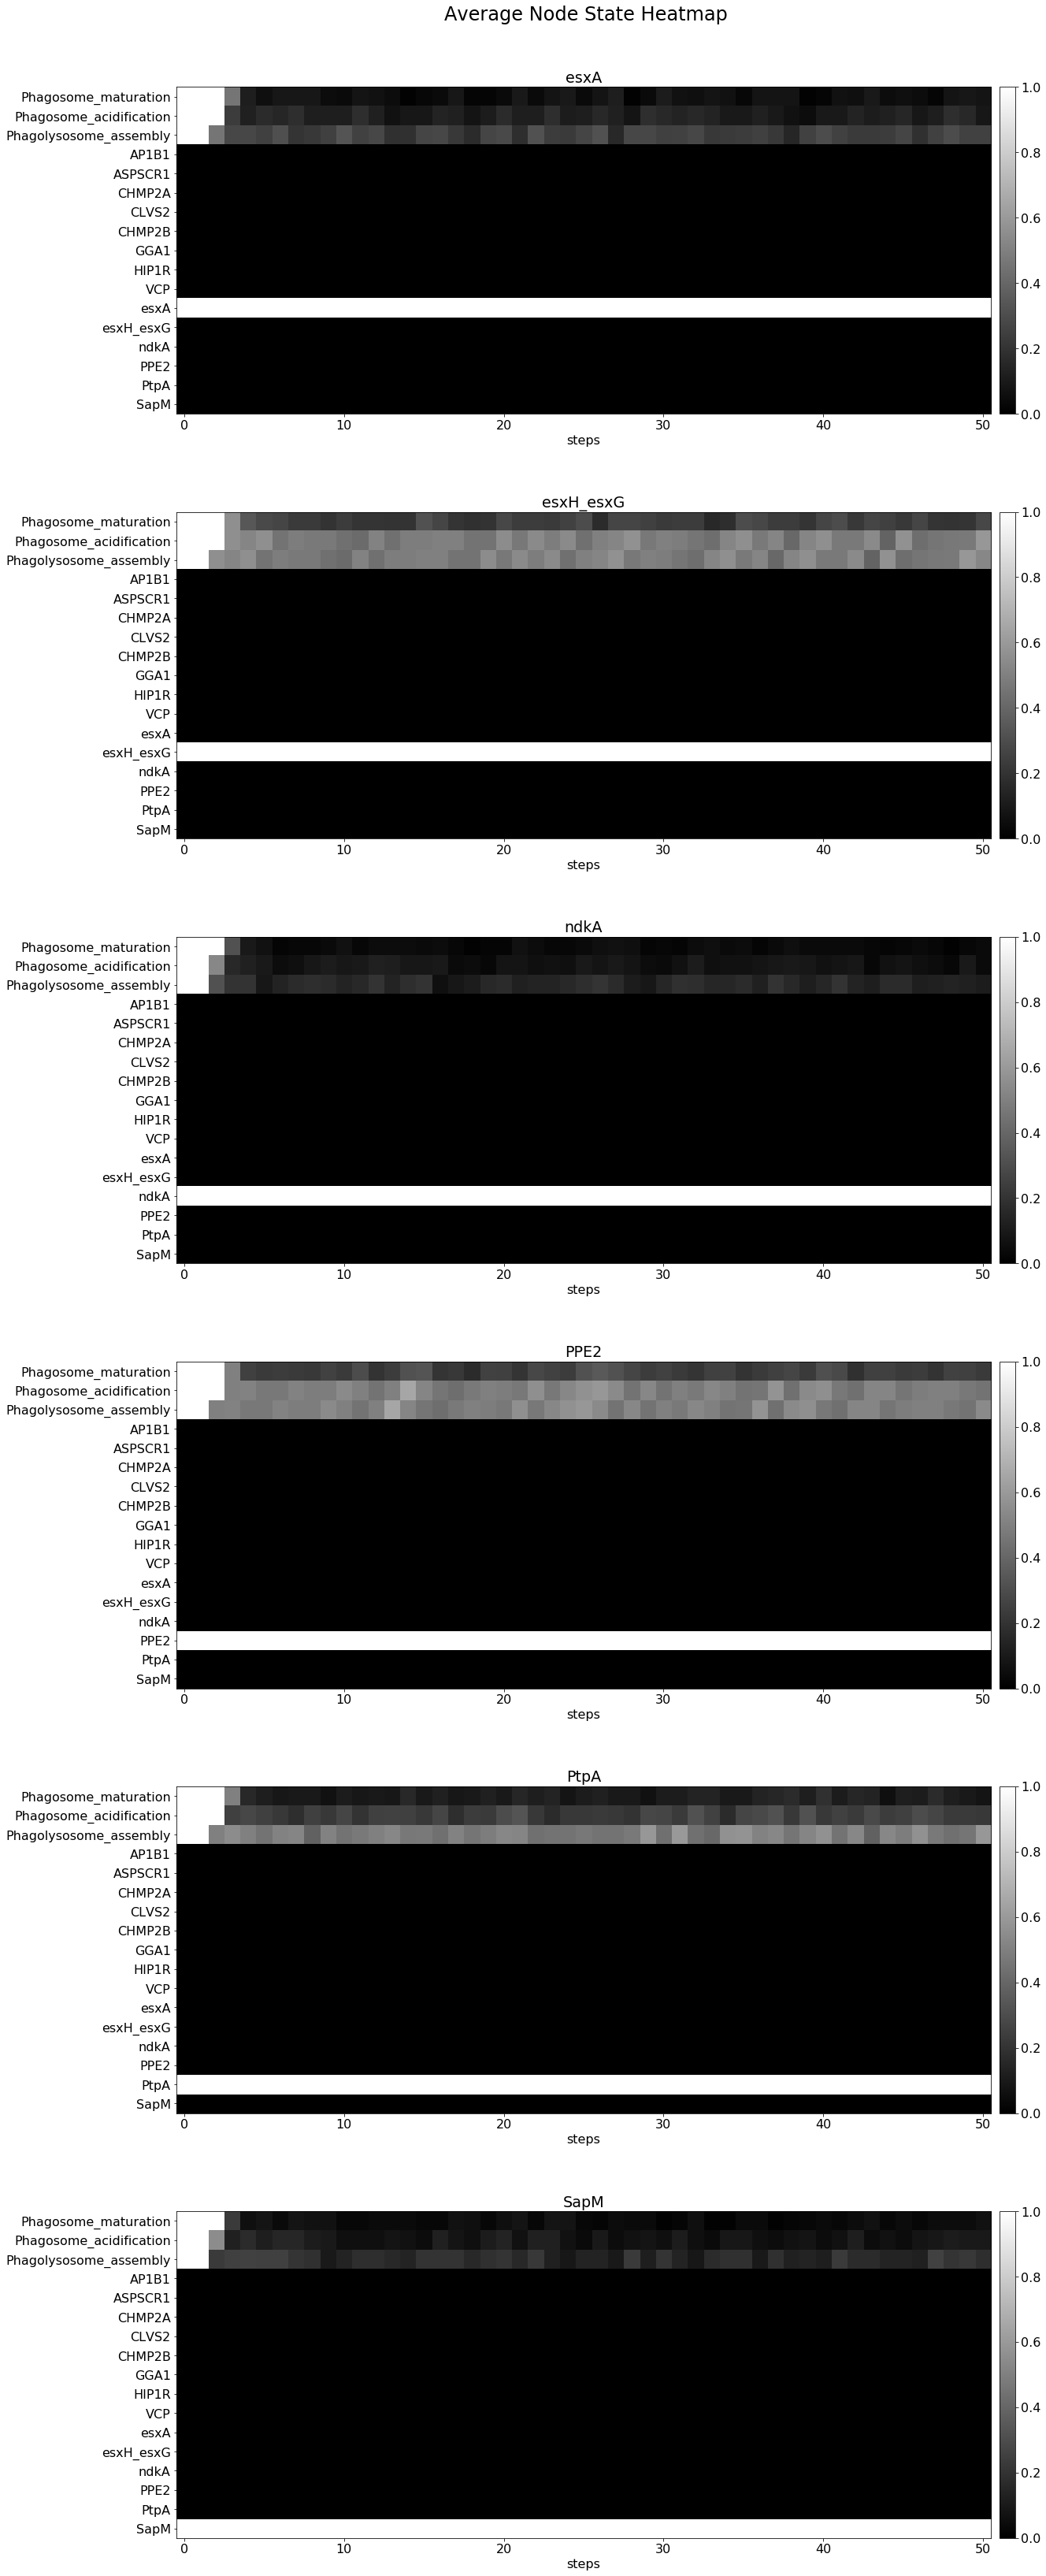

In [42]:
bm.plot_maps(avgs,
             titles=mtb, 
             nodes = processes + hit + mtb,
             h = 8,
             top = 0.95,
             bottom=0.05,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.3
            )

In [43]:
definition_mtb = add_mtb2definition(definition, 'mtb-edgelist.csv', True)
print definition_mtb

added: ['SapM', 'esxH_esxG', 'ndkA', 'esxA', 'PtpA', 'PPE2']
#initial conditions
AP1B1 = True
ASPSCR1 = True
ATP6V1A = True
ATP6V1B2 = True
ATP6V1D = True
ATP6V1E1 = True
ATP6V1F = True
ATP6V1G1 = True
ATP6V1H = True
B2M = True
CALR = True
CD1B = True
CD1D = True
CD8A = True
CHMP2A = True
CHMP2B = True
CHMP3 = True
CHMP4B = True
CLVS2 = True
DERL1 = True
GGA1 = True
HGS = True
HIP1R = True
HLA-A = True
HLA-B = True
HLA-C = True
HLA-E = True
HLA-G = True
KLRC1 = True
KLRD1 = True
KPNA1 = True
KPNA2 = True
KPNB1 = True
NSFL1C = True
NUTF2 = True
RAB5A = True
RAB7A = True
RAN = True
STAM = True
TSG101 = True
UBXN7 = True
UFD1L = True
VCP = True
VPS33B = True
XPO1 = True
XPO5 = True
ESCRT_complexes = True
MHC_I_complexes = True
vATPase_complexes = True
ImportinBetaAlpha_complexes = True

#rules
vATPase_complexes *= ATP6V1F and ATP6V1B2 and ATP6V1A and ATP6V1G1 and ATP6V1D and ATP6V1E1 and ATP6V1H
ESCRT_complexes *= HGS and CHMP2A and CHMP4B and CHMP2B and CHMP3 and STAM and TSG101
MHC_I_co

In [44]:
avgs = []
for factor in hit:
    definition_loop = bm.knockout(definition_mtb, [factor])
    models = bm.run_model(definition_loop, steps=50, runs =100)
    avg = bm.average_models(models)
    avgs.append(avg)

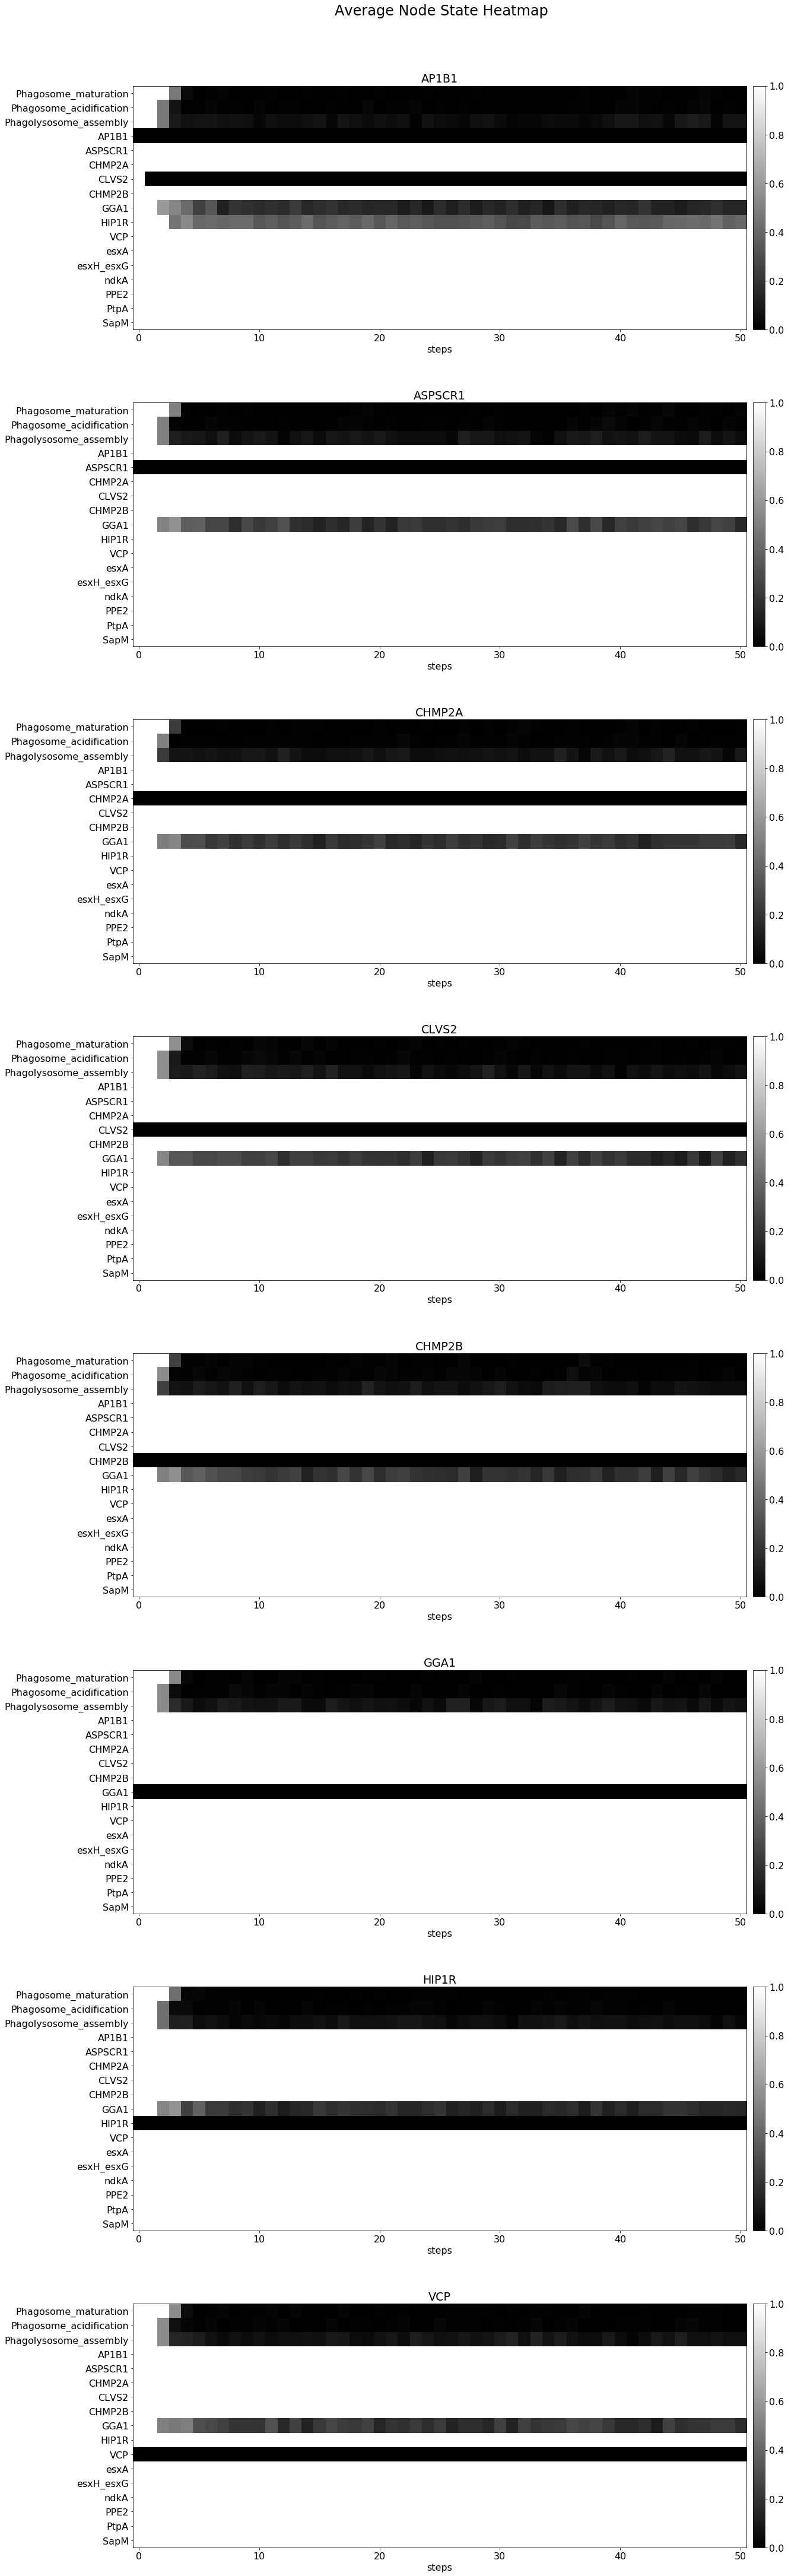

In [46]:
bm.plot_maps(avgs,
             titles=hit, 
             nodes = processes + hit + mtb,
             h = 8,
             top = 0.95,
             bottom=0.05,
             left=.16,
             suptitle='        Average Node State Heatmap', # white space to centre
             hspace = 0.3
            )
# for avg in avgs:
#     bm.plot_data(avg, nodes = processes + hit + mtb, h=8, w=20, fontsize=18, title='Node Heatmap: 100 run average')

### 